# HW1: Linear Regression

Created by Kien X. Nguyen and Xi Peng, Sept 2023.

## Questions and Answers [20 points]

Answer following questions. 

### Q.1 True or False [3 points]

Please choose True or False for each statement:

(a) Forecast tomorrow’s Dow Jones Industrial (DJI) index is a regression task.

True

(b) In general, semi-supervised learning is more challenging than unsupervised learning.

False

(c) It is impossible to solve a classification task using unsupervised learning techniques.

False

(d) How to generate an image (or an audio sequence) is a reinforcement learning task.

False

(e) It is hard for machine learning model to know “I do now know”.

False

(f) The goal of life-long learning is to learn for a long time rather than addressing the catastrophic forgetting issue.

False

### Q.2 Gradient descent [4 points]

Suppose we are using gradient descent to learn linear regression. The hypothesis is $h_{\theta}(x)=\theta_0+\theta_1x$. The initial values are $\theta_0=2$,$\theta_1=1$, and the learning rate is $0.1$. Suppose we have one data exmaple $(5,5)$ and use only this data example to update the model:

(a) After the first step update, what is $\theta_0$ and $\theta_1$, respectively?

$x=5, \alpha = 0.1$

$h_{\theta}(x)=2+1*5=7, \text{actual} = 5, 7-5=2$

$\frac 1 2(h_{\theta}(x)-y)^2 = \frac 1 2(2)^2 = 2$

Partial of $\theta_0=\theta_0+\theta_1x-y$

Partial of $\theta_1=(\theta_0+\theta_1x-y)*x$

$\theta_0=\theta_0-0.1(\theta_0+\theta_1x-y)=2-0.1(2+5-5)=1.8$

$\theta_1=\theta_1-0.1((\theta_0+\theta_1x-y)*x)=1-0.1((2+5-5)*5)=1-0.1*10=0$

$\theta_0=1.8, \theta_1=0$

(b) After the second step update, what is $\theta_0$ and $\theta_1$, respectively?

$h_{\theta}(x)=1.8+0*5=1.8, \text{actual} = 5, 1.8-5=-3.2$

$\frac 1 2(h_{\theta}(x)-y)^2 = \frac 1 2(-3.2)^2 = 5.12$

Partial of $\theta_0=\theta_0+\theta_1x-y$

Partial of $\theta_1=(\theta_0+\theta_1x-y)*x$

$\theta_0=\theta_0-0.1(\theta_0+\theta_1x-y)=1.8-0.1(1.8+0*5-5)=1.8-0.1(-3.2)=2.12$

$\theta_1=\theta_1-0.1((\theta_0+\theta_1x-y)*x)=0-0.1((1.8+0*5-5)*5)=0-0.1*-16=1.6$

$\theta_0=2.12, \theta_1=1.6$

### Q.3  [5 points]

Consider the problem of predicting how well a student does in her second year of college/university, given how well she did in her first year. Specifcally, let x be equal to the number of "A" grades (including A-. A and A+ grades) that a student receives in their first year of college (freshmen year). We would like to predict the value of y, which we define as the number of "A" grades they get in their second year (sophomore year).
Here each row is one training example. Recall that in linear regression, our hypothesis is $h_{\theta}(x)=\theta_0+\theta_1x$, and we use m to denote the number of training examples.

| x | y |
|---|---|
| 3 | 2 |
| 1 | 2 |
| 0 | 1 |
| 4 | 3 |

For the training set given above (note that this training set may also be referenced in other questions in this quiz), what is the value of m? (which should be a number between 0 and 10).

$m=4$

### Q.4  [4 points]

For this question, assume that we are using the training set from Q.3. Recall our definition of the cost function was $J\left(\theta_{0}, \theta_{1}\right)=\frac{1}{2 m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}$. What is $J(0,1)$ (Simplify fractions to decimals when entering answer, and '.' as the decimal delimiter e.g., 1.5).

$x=[3,1,0,4], y=[2,2,1,3]$

$J(0,1)=\frac{1}{2*4}((0+1*3-2)^2+(0+1*1-2)^2+(0+1*0-1)^2+(0+1*4-3)^2)=\frac{1}{8}(1+1+1+1)=\frac{4}{8}=0.5$


### Q.5  [4 points]

In the given figure, the cost function $J\left(\theta_{0}, \theta_{1}\right)$ has been plotted against $\theta_{0}$ and $\theta_{1}$, as shown in 'Plot 2'. The contour plot for the same cost function is given in 'Plot 1'. Based on the figure, choose the correct options (check all that apply).

<img src="figure/loss_landscape.png" width="800" height="400">

(a) Point P (The global minimum of plot 2) corresponds to point C of Plot 1.

False

(b) Point P (the global minimum of plot 2) corresponds to point A of Plot 1.

True

(c) If we start from point B, gradient descent with a well-chosen learning rate will eventually help us reach at or near point A, as the value of cost function $J\left(\theta_{0}, \theta_{1}\right)$ is minimum at A.

True

(d) If we start from point B, gradient descent with a well-chosen learning rate will eventually help us reach at or near point C, as the value of cost function $J\left(\theta_{0}, \theta_{1}\right)$ is minimum at point C.

False

(e) If we start from point B, gradient descent with a well-chosen learning rate will eventually help us reach at or near point A, as the value of cost function $J\left(\theta_{0}, \theta_{1}\right)$ is maximum at point A.

False


## 1. Linear Regression [25 points]

In this section, we are going to implement linear regression from scratch using NumPy, a popular scientic Python package.

First, we need to import some necessary Python packages. NumPy, Matplotlib and Scikit-learn are three of the most popular packages in Machine Learning.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression



The ```create_dataset()``` method allows us to create a customizable synthetic dataset. ```n_samples``` means the number of data points in the dataset, ```n_features``` means the dimension of the input ```X```.

In [5]:
def create_dataset(n_samples=20, n_features=1, noise=0.4):
    X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=noise)
    return X, y



Next we call the method to create our dataset and assign the return values to ```X```, the inputs, and ```y```, the ground truth labels.

In [6]:
X, y = create_dataset(n_samples=100, n_features=1, noise=10.0)



Visualize the dataset by running the following cell.

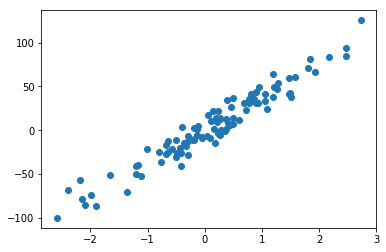

In [7]:
plt.scatter(X, y)
plt.show()



### 1.1 The ```LinearReg``` Class [20 points]

Here, we implement the class for our Linear Regression algorithm. Some parts of the code are missing and needed to be filled in. Hints are given throughout the missing codes. Please refer to what has been covered in slides to complete the codes.

In [15]:
class LinearReg:
    
    def __init__(self, learning_rate=0.01, epochs=10000, lmbda=0.0):
        self.epochs = epochs # number of epochs to train
        self.lr = learning_rate # learning rate - how fast the model should be updated
        self.w = None # the weights or coefficients
        self.b = None # the bias term
        self.lmbda = lmbda # regularization coefficient
        self.cost_list = [] # cost list for plotting
        
    def __initial_params(self, shape):
        #initialize weigth and bias as zeros
        
        #### START CODE HERE (~2 line) ####
        self.w = np.zeros(shape)
        self.b = 0

        
        #### END CODE HERE ####
        
    def __predictions(self, X):
        return np.dot(X, self.w) + self.b
    
    def __calculate_cost(self, error):
        #Calculate cost
        # Return: The mean squared error (MSE) of a given error vector. 
        # MSE = (1/2n) * Σ(y_actual - y_pred)^2  + regularization term
        # Where: n is the total number of data points.  Σ represents the summation symbol, indicating that you need to sum up the squared differences for all data points.

        ### START CODE HERE ### (≈ 1 lines of code)
        cost = (1/(2 * X.shape[0])) * np.sum(error ** 2) + self.lmbda * np.sum(self.w ** 2)

        ### END CODE HERE ###      

    def __gradient_descent(self, X, y, y_pred):
        # difference between prediction and actual
        error = y_pred - y
        
        # calculate cost and append them to list
        cost = self.__calculate_cost(error)
        self.cost_list.append(cost)

        # Calculate gradients
        # Return:
        # dw -- gradient of the loss with respect to w, thus same shape as w
        #    -- make sure to account for the regularization term!
        # db -- gradient of the loss with respect to b, thus same shape as b

        ### START CODE HERE ### (≈ 3 lines of code)
        dw = (1 / X.shape[0]) * np.dot(X.T, error) + self.lmbda * self.w
        db = (1 / X.shape[0]) * np.sum(error) 
        return dw, db

        
        
        ### END CODE HERE ###
    
    def __update_parameters(self, dw, db):
        #update weight and bias with gradients
        self.w -= self.lr * dw
        self.b -= self.lr * db
        
        return True
    
    def fit(self, X, y):
        """fits the model"""
        self.__initial_params(X.shape[1])
        for _ in range(self.epochs):
            y_pred = self.__predictions(X)
            dw, db,  = self.__gradient_descent(X, y, y_pred)
            self.__update_parameters(dw, db)
        return True
    
    def predict(self, X):
        return self.__predictions(X)
    
    def calculate_rmse(self, y_real, y_pred):
        """returns root mean square error"""
        
        ### START CODE HERE ### (≈ 1 lines of code)     
        rmse = np.sqrt(np.mean((y_real - y_pred) ** 2))   

        ### END CODE HERE ###       

    def get_params(self):
        return self.w, self.b
    
    def plot_cost(self):
        """plots the progress of cost on each iteration"""
        plt.title('Cost Function J')
        plt.xlabel('No. of iterations')
        plt.ylabel('Cost')
        plt.plot(self.cost_list)
        plt.show()
        
    def calculate_r2(self, X, y):
        """returns r2"""
        sum_squares = 0
        sum_residuals = 0
        y_mean = np.mean(y)
        for i in range(X.shape[0]):
            y_pred = self.__predictions(X[i])
            sum_squares += (y[i] - y_mean) ** 2
            sum_residuals += (y[i] - y_pred) ** 2
        score = 1- (sum_residuals / sum_squares)
        return score
    
    

Finally, instantiate an instance of the ```LinearReg``` class, train it on the dataset via ```fit()```, and test its final predictions.

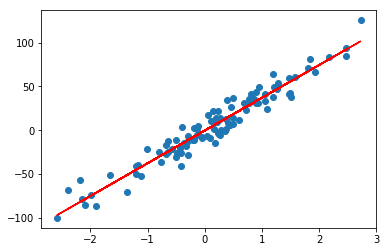

In [16]:
reg = LinearReg(learning_rate=0.01,epochs=10000)
reg.fit(X, y) # fit/train the model

# get predictions
y_pred = reg.predict(X)

# plot
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()



### 1.2 Compare to Built-in Methods [5 points]

In this section, you will call the Linear Regression algorithm built into ```scikit-learn``` and compare the one we built to theirs on the dataset we just created in this assignment. Please refer to their official [website](https://scikit-learn.org/stable/) and documentation for the implementation.

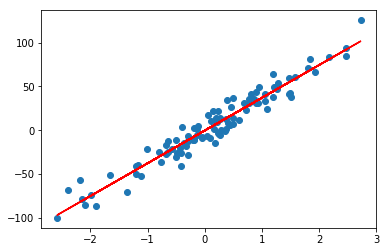

In [18]:
# ======================= YOUR CODE HERE ===========================

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()


# ==================================================================


## 2 Regularized Linear Regression and Polynomial Regression [55 points]

In this part of the exercise, you will replicate and expand upon the prototype data analysis problem in the lecture on Polynomial Regression.

### 2.1 Regularization [10 points]

We create the data by sampling the sinusoidal function $f(x)=sin(2\pi x), x \in [0,1]$. Write the code to generate a dataset consisting of $m=200$ by evaluating the function $f(x)$ at $m$ uniformly sapced points in $x$ and adding I.I.D. white Gaussian noise with deviation $\sigma=0.1$. For instance: $$x_i = \frac{i}{m}, i=0,1,2,\cdots,m-1, y_i = f(x_i)+\epsilon_i, \epsilon_i \sim \mathcal{N}(0, \sigma^2)$$

Once generate the dataset, we can plot it out. You should get a similar figure like this:

![c](figure/dataset.png)

In [19]:
def create_poly_dataset(n_samples, mu=0, sigma=0.1):
    # mu is the mean of the normal distribution that we are going to sample the noise from
    # sigma is the std of the normal distribution that we are going to sample the noise from
    m = n_samples
    X_data = np.array([(i)/(m) for i in range(m)])

    # Calculate Y
    # Plot the dataset
    # ======================= YOUR CODE HERE ===========================
    # create an array of normally distributed data (noise) the same size as X data
    noise = np.random.normal(mu, sigma, m)
    # calculate the sine data from X data and add the noise
    Y_data = np.sin(2 * np.pi * X_data) + noise
    return X_data, Y_data

# create and plot the dataset
# ======================= YOUR CODE HERE ===========================

X, y = create_poly_dataset(100, 0, 0.1)


# ==================================================================



Next, use the above ```LinReg``` class to train multiple regressors with different regularization coefficients ```lambda```. Then, plot the results of training and testing errors against the coefficients, like the example in the course slide.

Your plot does not have to resemble exactly the plot below. As long as it conveys the overfitting and underfitting phenomena, you will get full credit for this part.

<img src="figure/regularization.png" alt="regularization plot" width="400"/>

In [ ]:
# ======================= YOUR CODE HERE ===========================



# ==================================================================



### 2.2 Normal equation [20 points]

Normal equation is the closed-form solution to linear regression, formulated as:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. 

Hint: Before implement normal_equation function, following example shows how to convert array data to a matrix with a shape of $m \times 1$, and generate polynomial features matrix $[1, X, X^2, X^3, \cdots]$.

In [ ]:
# Here is an example that converts X to a column matrix of 5 x 1 and generates polynomial [1 X X^2 X^3]
# Use this hint to implement normal_equation()
X_col = X_data[:5].reshape(5,1)
X_poly = np.power(X_col, np.arange(4))
print(X_col)
print(X_poly)



Complete the code for `normal_equation()` below which uses normal equation to estimate $\theta$ based on $X$ and $Y$. 

In [ ]:
def normal_equation(X, Y, n):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m, ).
    
    Y : array_like
        The value at each data point. A vector of shape (m, ).
        
    n : the order of polynomial regression model
        Remember the number of features will be n+1.
    
    Returns
    -------
    theta : array_like
        Estimated polynomial regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    m = X.size
    theta = np.zeros(n+1)
    
    # ===================== YOUR CODE HERE ============================
    X_col = 
    X_poly = 
    Y_col = 
    
    theta = 
        
    # =================================================================
    return theta.flatten()



Complete the code for `polynomial_deploy()` below which uses estimated $\theta$ to predict $Y$ given $X$. 

In [ ]:
def polynomial_deploy(X, theta):
    """
    Computes the polynomial regression prediction for data X.
    
    Parameters
    ----------
    X : array_like
        The input data. A vector of shape (m, ).
    
    theta : array_like
        Polynomial regression parameters. A vector of shape (n+1, ).
    
    Returns
    -------
    Y : array_like
        Polynomial prediction. A vector of shape (m, ).
    
    """
    m = X.size
    n = theta.size - 1
    
    # ===================== YOUR CODE HERE ============================
    X_col = 
    X_poly = 
    
    theta_col = 
    
    Y = 
    # ===================== YOUR CODE HERE ============================
    
    return Y.flatten()



### 2.3 Polynomial fitting [15 points]

Now repeat the polynomial fitting experiment by selecting a random subset of the dataset to train the model. The training set size is selected as: $m=\{10, 50, 100, 200\}$. The order of polynomials is selected as: $n=\{0,1,2,3,9\}$. So totally you will train $4\times5=20$ models.

For each model, report estimated model parameters, calculate the MSEs, and plot the regression model together with the data examples used for training.

In [ ]:
# You MUST use LOOP to traverse the combinations of m and n
#
# Hint for debug:
# A quick way to check if your implementation is correct is to use 'np.polyfit'
# e.g. theta = np.polyfit(X_data, Y_data, n)
# Check if 'theta' estimated by normal_equation() is the same as 'theta' 

for m in [10, 50, 100, 200]:
    for n in [0, 1, 2, 3, 9]:
        subset_index = np.random.randint(0, X_data.size, m)
        
        X_subset = X_data[subset_index]
        Y_subset = Y_data[subset_index]
        
        # ===================== YOUR CODE HERE ============================
        theta = 
        Y_predict = 
        MSE = 
                        
        print('The order of polynomial: %d' % n)
        print('Theta:')
        print(theta)
        print('MSE: %.8f' % MSE)
        
        # plot the polynomial curve
        plt.figure()
        plt.title('m=%d, n=%d, MSE=%.8f' % (m, n, MSE))
        plt.plot(X_subset, Y_subset, 'b+')
        X_plot = np.arange(0,1,0.01)
        Y_plot = polynomial_deploy(X_plot, theta)
        plt.plot(X_plot, Y_plot, 'r-')          
        # =================================================================
        
        

Next, implement a scenario where the training set size is fixed (your choice), fit the model on different polynomial degrees and plot them agains train and test errors, like the plot in the course slide.

Again, your plot does not have to resemble exactly the plot below. As long as it conveys the overfitting and underfitting phenomena, you will get full credit for this part.

<img src="figure/poly.png" alt="regularization plot" width="600"/>

In [ ]:
# ======================= YOUR CODE HERE ===========================



# ==================================================================



### 2.4 Discussions [10 points]

Based on the experimental results, talk about your observations. 

======================= YOUR DISCUSSION HERE ==========================

Try to talk about following aspects:
1. Given fixed m, when n increase, how about underfitting/overfitting and fitting error?  
2. Given fixed n, when m increase, how about underfitting/overfitting and fitting error?
3. Which model has the best performance? And why?
4. Your conclusion.

=======================================================================